## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Above two lines will allow to display node wise computation

In [3]:
df = pd.read_csv('Ecommerce Customers')

In [4]:
df.head()
df.describe()
df.info()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


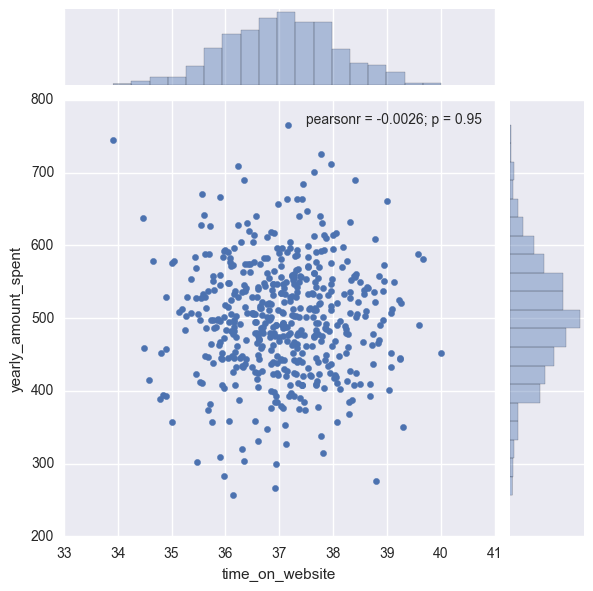

In [5]:
df.columns= df.columns.str.lower().str.replace(' ', '_')
sns.jointplot(df.time_on_website,df.yearly_amount_spent)


## Find another relationship if that matters

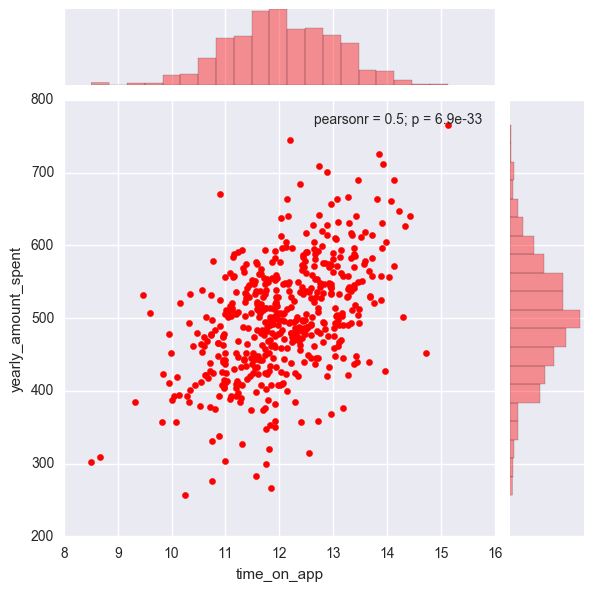

In [6]:
sns.jointplot(df.time_on_app,df.yearly_amount_spent, color='red')

## Explore with hex map

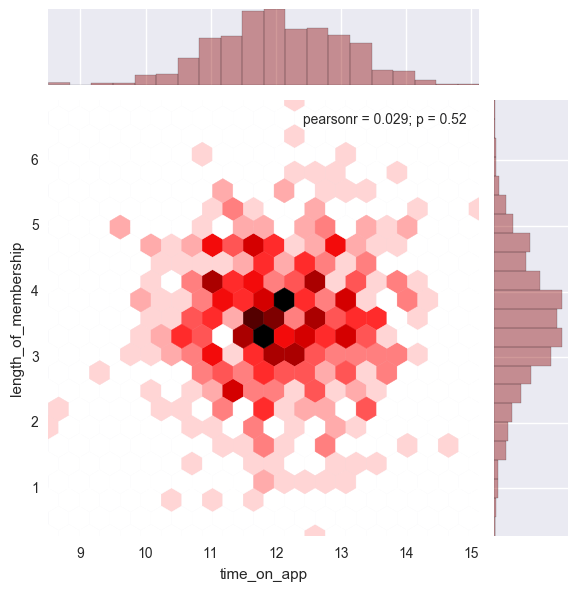

In [7]:
sns.jointplot(df.time_on_app,df.length_of_membership, kind='hex', color='darkred')

## Exploring Type of relationship

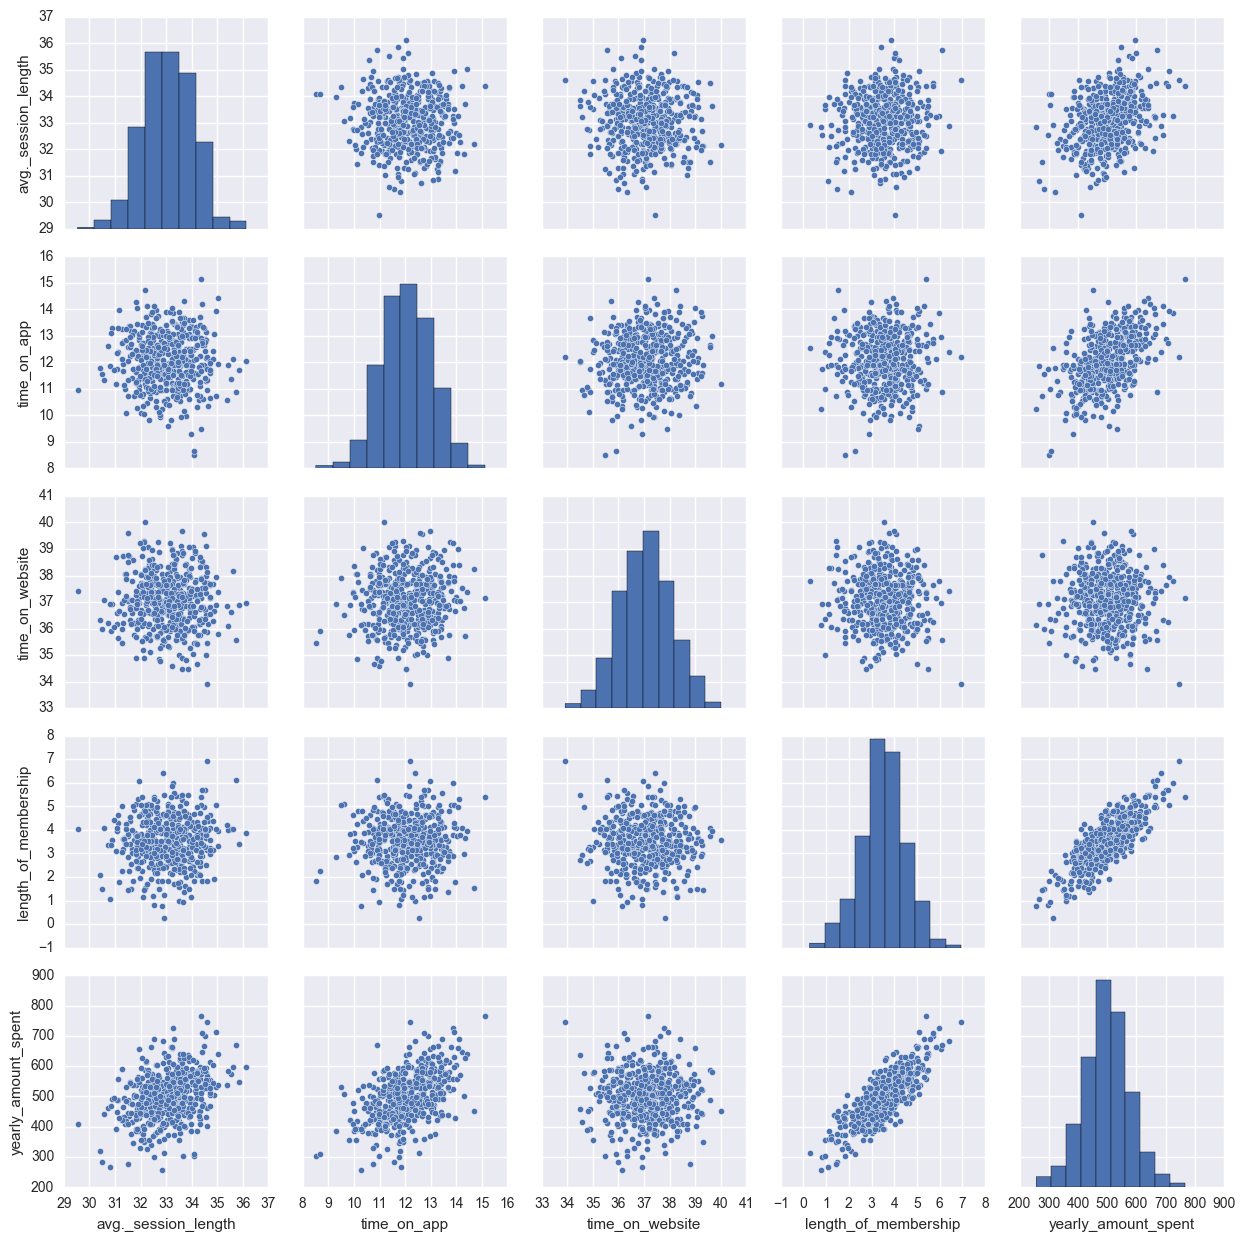

In [8]:
sns.pairplot(df,palette='blue')

## What is the most correlated features

In [9]:
# The most correlated features seems to be length of membership

Check the regression for length of membership and yearly amount

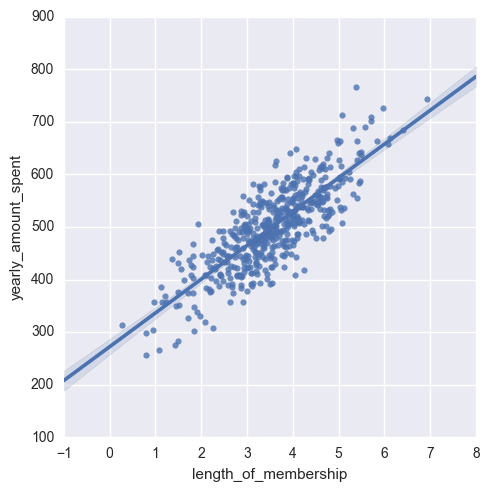

In [11]:
# Regression Plot
df.length_of_membership
sns.lmplot(x='length_of_membership',y='yearly_amount_spent' ,data=df);

## Training and Testing Data


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
df.info()
# grab all the float type data column except the yearly_amount column
X = df[(df.select_dtypes(include=['float64'])).columns[:-1]]
y = df['yearly_amount_spent']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
email                   500 non-null object
address                 500 non-null object
avatar                  500 non-null object
avg._session_length     500 non-null float64
time_on_app             500 non-null float64
time_on_website         500 non-null float64
length_of_membership    500 non-null float64
yearly_amount_spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [16]:
y_test

NameError: name 'y_test' is not defined

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Train the Model




In [ ]:
lr = LinearRegression()

## Fit it

In [ ]:
lr.fit(X_train,y_train)

## Coefficeints ??

In [ ]:
coeffDf = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeffDf

## Predict Test Data
Predict and Evaluete


In [ ]:
pred = lr.predict(X_test)

## Test vs Predicted 

In [ ]:
plt.scatter(y_test,pred)
# looks a good fit /lets see the residuals

## Evaluate the Model


In [ ]:
mae = metrics.mean_absolute_error(y_test,pred)
mse = metrics.mean_squared_error(y_test,pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
print 'MAE : ',mae
print 'MSE : ',mse
print 'RMSE : ',rmse

## Explore Residuals



In [ ]:
# residual = actual/observed/expected - predicted value
# Note if the residuals are not normally distributed check the we need to think about the model again.
sns.distplot(y_test-pred)

## Interprete Coefficient


In [ ]:
coeffDf

Having all the features constant , 1 unit increase in all the features will correspond to the increment of each value on the coefficient to the Corresponding prcie

In [ ]:
sns.heatmap(df.corr(),annot=True)
coeffDf

## On what features the company should put more time on?

In [ ]:
sns.jointplot(df.time_on_app,df.length_of_membership)


Since the app is doing better, and web is not good, it is better to work with web and meet the app, or just opposite Depending upon the business model, it can be decided .If the modle is based on mobile then it is performing better and spend more time to make it better and less time on web.Or vice-versa